# **Downloading Data from Kaggle**


In [13]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.3 MB/s 
     |████████████████████████████████| 155 kB 8.3 MB/s 
     |████████████████████████████████| 247 kB 52.2 MB/s 
     |████████████████████████████████| 62 kB 2.0 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 140 kB 70.6 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 61 kB 129 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=9a3e2d7191aafa3542a97e3dd48f128110173bbb756de156079a3b0b2e9d35e4
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muizzahkhan","key":"54bf8e6e9112d814244c3948f03aae43"}'}

In [15]:
!mkdir ~/.kaggle #created at root folder in colab

In [16]:
!cp kaggle.json ~/.kaggle

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10499        309  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1584         49  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6573        148  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [19]:
!kaggle datasets download -d puneet6060/intel-image-classification

 93% 323M/346M [00:02<00:00, 194MB/s]
100% 346M/346M [00:02<00:00, 172MB/s]


In [20]:
!unzip -q intel-image-classification.zip

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

# Model Making, Training and Testing

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
     

In [24]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #1st layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #2nd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #3rd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #4th layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax')                                                       
])

In [25]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 61, 61, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 59, 59, 32)        4640      
                                                      

In [26]:
train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"


In [27]:
from keras_preprocessing.image import ImageDataGenerator

In [28]:
import tensorflow as tf


In [29]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = tf.keras.utils.image_dataset_from_directory(train_path, image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='training', validation_split = 0.2, seed=42)
test_fed = tf.keras.utils.image_dataset_from_directory(test_path, image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='validation', validation_split = 0.2, seed=42)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [30]:
import numpy as np

In [31]:
class_names = train_fed.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [32]:
class_names = ()

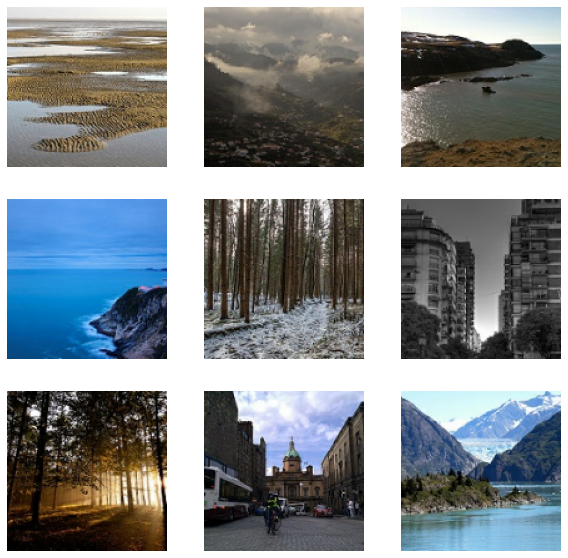

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_fed.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")


In [33]:
from keras.optimizers import Adam
alexnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
     

In [34]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py


In [35]:
erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/kaggle/working/my_model.hdf5', monitor='val_loss', save_best_only=True)
lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [36]:
hist = alexnet.fit(train_fed, shuffle=True, epochs=20, validation_data=test_fed,
                           callbacks=[erl_stop, mod_chk, lr_rate], verbose=1)

Epoch 1/20
351/351 [==============================] - 27s 47ms/step - loss: 1.7102 - accuracy: 0.2740 - val_loss: 1.3306 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 2/20
351/351 [==============================] - 13s 36ms/step - loss: 1.2091 - accuracy: 0.5147 - val_loss: 1.1155 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 3/20
351/351 [==============================] - 13s 36ms/step - loss: 1.0345 - accuracy: 0.5775 - val_loss: 0.9129 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 4/20
351/351 [==============================] - 13s 36ms/step - loss: 0.9473 - accuracy: 0.6118 - val_loss: 0.8641 - val_accuracy: 0.6567 - lr: 0.0010
Epoch 5/20
351/351 [==============================] - 13s 35ms/step - loss: 0.9101 - accuracy: 0.6280 - val_loss: 0.9073 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 6/20
351/351 [==============================] - 13s 36ms/step - loss: 0.8507 - accuracy: 0.6550 - val_loss: 0.8619 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 7/20
351/351 [==============================] - 13s 

In [42]:
alexnet.save_weights('alexnet_trained_intelimg_pref.h5')

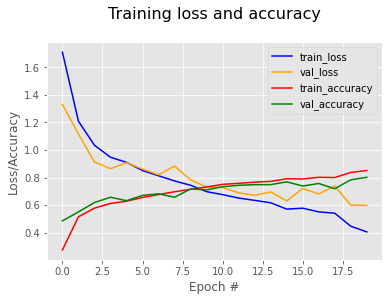

In [49]:
plt.style.use('ggplot')
plt.plot(hist.history['loss'], color='blue', label='train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(hist.history['accuracy'], color='red', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.grid(True)
plt.title("Training loss and accuracy\n", fontsize=16)
plt.xlabel("Epoch #", fontsize=12)
plt.ylabel("Loss/Accuracy", fontsize=12)
plt.legend()
plt.show();